This module will contain the practice assignment for module 2.
It is based on the Pytorch workflow fundamentals

In [1]:
import torch

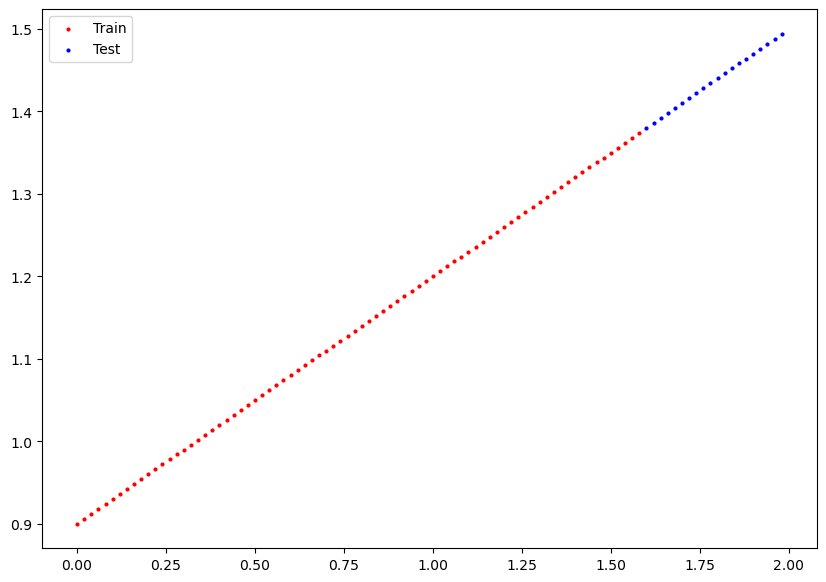

In [14]:
# 1. Create a straight line dataset using the linear regression formula (weight * X + bias).
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

weight = 0.3
bias = 0.9

X = torch.arange(0,2,0.02).unsqueeze(1)
Y = weight*X + bias

# Split the data into 80% training, 20% testing.
train_size = int(0.8 * len(X))
X_train = X[:train_size]
Y_train = Y[:train_size]

X_test = X[train_size:]
Y_test = Y[train_size:]

# Plot the training and testing data so it becomes visual

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train,Y_train, color='r', s=4, label="Train")
plt.scatter(X_test,Y_test, color='b', s=4, label="Test")
plt.legend()

In [22]:
# 2. Build a PyTorch model by subclassing nn.Module
# Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
# Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
class LRModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.rand(1,requires_grad=True))
        self.bias = torch.nn.Parameter(torch.rand(1,requires_grad=True))
    
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias
    
# Once you've constructed the model, make an instance of it and check its state_dict().
model1 = LRModel()
model1.state_dict()

OrderedDict([('weights', tensor([0.7070])), ('bias', tensor([0.1049]))])

In [44]:
# 3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
loss_func = torch.nn.L1Loss()
# Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2
opt = torch.optim.SGD(params = model1.parameters(), lr=0.01)
train_loss_values = []
test_loss_values = []
epoch_count = []
# Write a training loop to perform the appropriate training steps for 300 epochs
for epoch in range(300):
    model1.train()
    prediction = model1(X_train)
    loss = loss_func(prediction, Y_train)
    opt.zero_grad()
    loss.backward()
    opt.step()
    print("loss:", loss)
# Write a training loop to perform the appropriate training steps for 300 epochs.
# The training loop should test the model on the test dataset every 20 epochs.
    if epoch%20==0:
        model1.eval()
        with torch.inference_mode():
            test_predictions = model1(X_test)
            test_loss = loss_func(test_predictions, Y_test)
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

loss: tensor(0.0009, grad_fn=<MeanBackward0>)
Epoch: 0 | MAE Train Loss: 0.0008651614189147949 | MAE Test Loss: 0.023050755262374878 
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBackward0>)
loss: tensor(0.0009, grad_fn=<MeanBackward0>)
loss: tensor(0.0154, grad_fn=<MeanBack

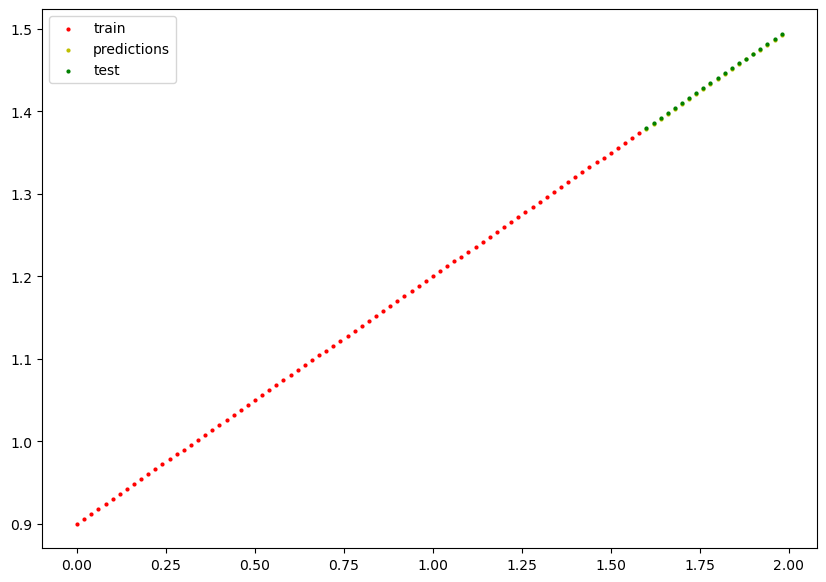

In [45]:
# 4. Make predictions with the trained model on the test data.
model1.eval()
with torch.inference_mode():
    final_predictions = model1(X_test)
# final_predictions
# Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, color='r',s=4,label="train")
plt.scatter(X_test, final_predictions, color='y',s=4,label="predictions")
plt.scatter(X_test, Y_test, color='g',s=4,label="test")
plt.legend()

In [54]:
# 5. Save your trained model's state_dict() to file.
from pathlib import Path

modelpath = Path("models")
modelpath.mkdir(parents=True, exist_ok=True)

modelname = "my_model1.pth"
model_full_path = modelpath/modelname

torch.save(model1.state_dict(), model_full_path)

# Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
model1_new_instance = LRModel()
model1_new_instance.load_state_dict(torch.load(f=model_full_path))

# Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4
new_predictions = model1_new_instance(X_test)
new_predictions==final_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])